<a href="https://colab.research.google.com/github/lawrence773/nuclear-project/blob/main/Nuclear_Tests_Between_1945_1998.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
<img src='https://1721181113.rsc.cdn77.org/data/images/full/34837/mushroom-cloud.jpg?w=600?w=430'>

In this project I am going to analyse the **nuclears tests** conducted in the 20th century.

The data was parsed by Sam Donald and is part of the CORGIS Dataset Project: https://think.cs.vt.edu/corgis/csv/nuclear_explosions/

The original report in a .pdf format can be found on the following link:
https://github.com/data-is-plural/nuclear-explosions/blob/master/documents/sipri-report-original.pdf

In the first part, I will **describe** and **clean** the data, after which I will create **charts** in order to better visualize it.

## **Setting up the environment**

In [1]:
# The following libraries are necessary to work with the data in a Python 3 environment.

%matplotlib inline
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import scipy.stats as stats
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Setting the format to display floating point numbers with two decimals
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## **Loading the data**

In [3]:
# Importing the .csv file
df_nuclear = pd.read_csv('data/nuclear_explosions.csv')


In [4]:
# Let's see how the beginning and the end of our data looks
df_nuclear

,Location.Country,Location.Region,Data.Source,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Coordinates .Depth,Data.Yield.Lower,Data.Yield.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year
0,USA,Alamogordo,DOE,32.54,-105.57,0.00,0.00,-0.10,21.00,21.00,Wr,Trinity,Tower,16,7,1945
1,USA,Hiroshima,DOE,34.23,132.27,0.00,0.00,-0.60,15.00,15.00,Combat,Littleboy,Airdrop,5,8,1945
2,USA,Nagasaki,DOE,32.45,129.52,0.00,0.00,-0.60,21.00,21.00,Combat,Fatman,Airdrop,9,8,1945
3,USA,Bikini,DOE,11.35,165.20,0.00,0.00,-0.20,21.00,21.00,We,Able,Airdrop,30,6,1946
4,USA,Bikini,DOE,11.35,165.20,0.00,0.00,0.03,21.00,21.00,We,Baker,Uw,24,7,1946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,CHINA,Lop Nor,HFS,41.69,88.35,5.30,0.00,0.00,3.00,12.00,Wr,Nan,Ug,29,7,1996
2042,INDIA,Pokhran,HFS,27.07,71.70,5.30,0.00,0.00,0.00,20.00,Wr,Shakti 1-3,Ug,11,5,1998
2043,INDIA,Pokhran,NRD,27.07,71.70,0.00,0.00,0.00,0.00,1.00,Wr,Nan,Ug,13,5,1998
2044,PAKIST,Chagai,HFS,28.90,64.89,0.00,0.00,0.00,0.00,35.00,Wr,Nan,Ug,28,5,1998


Let's examine our dataframe


*   First, I will check the shape of the dataframe
*   Then, I will check the data types for each column
*   After that, I will see if there are any NaN values
*   Finally, I will look for duplicate rows




In [5]:
# Checking the shape of the dataframe (row number, column number)
df_nuclear.shape

(2046, 16)

In [6]:
# Checking the data types of each column
df_nuclear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Location.Country                2046 non-null   object 
 1   Location.Region                 2046 non-null   object 
 2   Data.Source                     2046 non-null   object 
 3   Location.Coordinates.Latitude   2046 non-null   float64
 4   Location.Coordinates.Longitude  2046 non-null   float64
 5   Data.Magnitude.Body             2046 non-null   float64
 6   Data.Magnitude.Surface          2046 non-null   float64
 7   Location.Coordinates .Depth     2046 non-null   float64
 8   Data.Yield.Lower                2046 non-null   float64
 9   Data.Yield.Upper                2046 non-null   float64
 10  Data.Purpose                    2046 non-null   object 
 11  Data.Name                       2046 non-null   object 
 12  Data.Type                       20

In [7]:
# Checking for NaN values
df_nuclear.isna().values.any()

False

Although the search didn't yield any NaN values, we notice that the Data.Name column actually has several "Nan" values in it which was likely used by the parser to indicate no available data. For the time being, I will leave them in the dataframe.

In [8]:
# Checking for duplicate values
df_nuclear.duplicated().values.any()

True

Let's see these duplicate rows:




In [9]:
# By setting the keep argument False, we can see all rows that are doubled
df_nuclear[df_nuclear.duplicated(keep=False)]

,Location.Country,Location.Region,Data.Source,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Coordinates .Depth,Data.Yield.Lower,Data.Yield.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year
351,USSR,Mtr Russ,MTM,48.00,46.00,0.00,0.00,0.00,1.20,1.20,We,Nan,Space,27,10,1961
352,USSR,Mtr Russ,MTM,48.00,46.00,0.00,0.00,0.00,1.20,1.20,We,Nan,Space,27,10,1961
1598,USSR,Semi Kazakh,MTM,50.00,78.00,0.00,0.00,0.00,0.00,20.00,Wr,Nan,Tunnel,5,12,1980
1599,USSR,Semi Kazakh,MTM,50.00,78.00,0.00,0.00,0.00,0.00,20.00,Wr,Nan,Tunnel,5,12,1980
1788,USSR,Perm Russ,NOA,61.00,58.00,4.50,0.00,0.00,3.20,3.20,Pne,Geliy,Shaft,28,8,1984
1789,USSR,Perm Russ,NOA,61.00,58.00,4.50,0.00,0.00,3.20,3.20,Pne,Geliy,Shaft,28,8,1984


Since these row pairs are identical in every aspect, we can safely drop them form the dataframe by setting the keep argument to "first" which will keep the first occurrence of the duplicated row.




In [10]:
df_nuclear[df_nuclear.duplicated(keep="first")]

,Location.Country,Location.Region,Data.Source,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Coordinates .Depth,Data.Yield.Lower,Data.Yield.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year
352,USSR,Mtr Russ,MTM,48.00,46.00,0.00,0.00,0.00,1.20,1.20,We,Nan,Space,27,10,1961
1599,USSR,Semi Kazakh,MTM,50.00,78.00,0.00,0.00,0.00,0.00,20.00,Wr,Nan,Tunnel,5,12,1980
1789,USSR,Perm Russ,NOA,61.00,58.00,4.50,0.00,0.00,3.20,3.20,Pne,Geliy,Shaft,28,8,1984


That's better. By now, we have noticed that the column names are too long so I will rename them to make the work easier and less prone to errors:



In [11]:
# Checking the column names
list(df_nuclear.columns)

['Location.Country',
 'Location.Region',
 'Data.Source',
 'Location.Coordinates.Latitude',
 'Location.Coordinates.Longitude',
 'Data.Magnitude.Body',
 'Data.Magnitude.Surface',
 'Location.Coordinates .Depth',
 'Data.Yield.Lower',
 'Data.Yield.Upper',
 'Data.Purpose',
 'Data.Name',
 'Data.Type',
 'Date.Day',
 'Date.Month',
 'Date.Year']

In [12]:
# Renaming columns for simplicity
df_nuclear.rename(columns = {'Location.Country':'Country',
                             'Location.Region':'Region',
                             'Data.Source':'Source',
                             'Location.Coordinates.Latitude':'Latitude',
                             'Location.Coordinates.Longitude':'Longitude',
                             'Data.Magnitude.Body':'Body_Wave_Magnitude',
                             'Data.Magnitude.Surface':'Surface_Wave_Magnitude',
                             'Location.Coordinates .Depth':'Explosion_Depth',
                             'Data.Yield.Lower':'Lower_Yield_KT',
                             'Data.Yield.Upper':'Upper_Yield_KT',
                             'Data.Purpose':'Purpose_of_Detonation',
                             'Data.Name':'Name',
                             'Data.Type':'Deployment_Method',
                             'Date.Day':'Day',
                             'Date.Month':'Month',
                             'Date.Year':'Year'}, inplace = True)

In [13]:
# df_nuclear.drop('Date', axis = 1)

In [14]:
# df_nuclear['Date'] = df_nuclear['Date'].astype(str)



Next, we notice that the dates of individual tests were split into three different columns which I will merge into a new column called "Date" and convert its values into a datetime format:




In [15]:
# Combining or concatenating columns
df_nuclear['Date'] = df_nuclear['Year'].astype(str) + '-' + df_nuclear['Month'].astype(str) + '-' + df_nuclear['Day'].astype(str)

In [16]:
# Converting the column into datetime format
df_nuclear['Date'] = pd.to_datetime(df_nuclear['Date'])

We can double check if our conversion was successful:



In [17]:
df_nuclear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Country                 2046 non-null   object        
 1   Region                  2046 non-null   object        
 2   Source                  2046 non-null   object        
 3   Latitude                2046 non-null   float64       
 4   Longitude               2046 non-null   float64       
 5   Body_Wave_Magnitude     2046 non-null   float64       
 6   Surface_Wave_Magnitude  2046 non-null   float64       
 7   Explosion_Depth         2046 non-null   float64       
 8   Lower_Yield_KT          2046 non-null   float64       
 9   Upper_Yield_KT          2046 non-null   float64       
 10  Purpose_of_Detonation   2046 non-null   object        
 11  Name                    2046 non-null   object        
 12  Deployment_Method       2046 non-null   object  

Now we can take a look at a sample of our dataframe:




In [18]:
df_nuclear.sample(20)

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,Day,Month,Year,Date
298,USSR,Mtr Russ,DOE,48.00,46.00,0.00,0.00,0.00,10.00,10.00,We,Nan,Atmosph,1,11,1958,1958-11-01
949,USSR,Semi Kazakh,MTM,50.00,78.00,0.00,0.00,0.00,0.00,20.00,Wr,Nan,Tunnel,4,4,1969,1969-04-04
1693,USSR,Nz Russ,UGS,73.39,54.56,5.60,3.60,0.00,0.00,150.00,Wr,Nan,Tunnel,11,10,1982,1982-10-11
800,USA,Nts,ISC,37.11,-116.10,4.60,0.00,0.00,0.00,20.00,Wr,Ward,Shaft,8,2,1967,1967-02-08
1068,USSR,Semi Kazakh,UGS,49.70,78.20,5.80,0.00,0.00,20.00,150.00,Pne,Nan,Tunnel,22,3,1971,1971-03-22
1338,USSR,Semi Kazakh,MTM,50.00,78.00,0.00,0.00,0.00,0.00,20.00,Wr,Nan,Tunnel,10,4,1976,1976-04-10
715,USA,Nts,ISC,37.13,-116.02,5.60,0.00,0.00,20.00,200.00,Wr,Corduroy,Shaft,3,12,1965,1965-12-03
2039,FRANCE,Fangataufa,WTN,-22.24,-138.81,0.00,0.00,0.00,0.00,120.00,Wr,Xouthos,Ug,27,1,1996,1996-01-27
474,USSR,Nz Russ,DOE,73.00,55.00,0.00,0.00,0.00,"2,400.00","2,400.00",Wr,Nan,Atmosph,21,9,1962,1962-09-21
1994,USA,Nts,HFS,37.26,-116.42,5.80,4.30,0.00,20.00,150.00,Wr,Bullion,Shaft,13,6,1990,1990-06-13


Next, we examine which columns might contain multiple categories. Upon checking for unique values, we can see that the Purpose_of_Detonation column has several cells where two or three different catogories are combined:

In [19]:
# Checking the unique values in a column
df_nuclear.Purpose_of_Detonation.unique()

array(['Wr', 'Combat', 'We', 'Me', 'Se', 'Fms', 'Sb', 'Sam', 'Pne:Plo',
       'Transp', 'Pne:V', 'Nan', 'Pne', 'Wr/Se', 'Wr/We', 'Wr/Pne',
       'Wr/Sam', 'Pne/Wr', 'Se/Wr', 'Wr/P/Sa', 'We/Sam', 'We/Wr',
       'Wr/F/Sa', 'Wr/Fms', 'Fms/Wr', 'Wr/P/S', 'Wr/F/S', 'Wr/We/S'],
      dtype=object)

In order to see the individual categories, we need to split up these values based on a common separating element ("/"), then stack them to see the list of unique values:

In [20]:
# Splitting and stacking up the unique values in a column
purpose_stack = df_nuclear.Purpose_of_Detonation.str.split('/', expand=True).stack()
num_purposes = purpose_stack.value_counts()
num_purposes

,count
Wr,1533
We,190
Pne,158
Se,84
Fms,41
Sam,34
Pne:Plo,27
Pne:V,7
Sb,5
Transp,4


The list presents us with a problem. Although most abbreviations are explained in the original documentation, some of the letters ("Sb") cannot be deciphered with certainty. I have chosen to convert the recognisable letters to appropriate abbreviations from the documentation and to the generic "Wr" (weapons testing) for the "Sb" values. Since the "Plo" and "V" designations were meant to distinguish between two US peaceful testing programmes (Plowshare Programme and Vela Uniform Test), these are not relevant in the present case. For the three cases where the "S" designation was uncertain, I checked the individual rows where the questionable designations appeared ("Wr/P/S", "Wr/F/S", "Wr/We/S"). All three tests were conducted by the USSR so the ambiguous "S" had to be changed to "Sam" and not "Se".

In [21]:
df_nuclear[df_nuclear.Purpose_of_Detonation == 'Wr/P/S']

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,Day,Month,Year,Date
1731,USSR,Nz Russ,UGS,73.38,54.91,5.90,4.20,0.00,0.00,150.00,Wr/P/S,Nan,Tunnel,18,8,1983,1983-08-18


In [22]:
df_nuclear[df_nuclear.Purpose_of_Detonation == 'Wr/F/S']

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,Day,Month,Year,Date
1903,USSR,Nz Russ,HFS,73.29,54.71,5.60,0.00,0.00,0.00,150.00,Wr/F/S,Nan,Tunnel,2,8,1987,1987-08-02


In [23]:
df_nuclear[df_nuclear.Purpose_of_Detonation == 'Wr/We/S']

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,Day,Month,Year,Date
1956,USSR,Nz Russ,HFS,73.39,55.00,6.70,4.00,0.00,0.00,150.00,Wr/We/S,Nan,Tunnel,4,12,1988,1988-12-04


In [24]:
# Collected all replacing lines of code into one function since Colab doesn't always run each line of code in the same cell
def replacer():
  df_nuclear.Purpose_of_Detonation.replace("Sb", "Wr", inplace=True)
  df_nuclear.Purpose_of_Detonation.replace("Nan", "Wr", inplace=True)
  df_nuclear.Purpose_of_Detonation.replace("Pne:Plo", "Pne", inplace=True)
  df_nuclear.Purpose_of_Detonation.replace("Pne:V", "Pne", inplace=True)
  df_nuclear.Purpose_of_Detonation.replace("Wr/P/Sa", "Wr/Pne/Sam", inplace=True)
  df_nuclear.Purpose_of_Detonation.replace("Wr/F/Sa", "Wr/Fms/Sam", inplace=True)
  df_nuclear.Purpose_of_Detonation.replace("Wr/P/S", "Wr/Pne/Sam", inplace=True)
  df_nuclear.Purpose_of_Detonation.replace("Wr/F/S", "Wr/Fms/Sam", inplace=True)
  df_nuclear.Purpose_of_Detonation.replace("Wr/We/S", "Wr/We/Sam", inplace=True)

In [25]:
replacer()

In [26]:
# Checking if the conversions were successful
purpose_stack = df_nuclear.Purpose_of_Detonation.str.split('/', expand=True).stack()
num_purposes = purpose_stack.value_counts()
num_purposes

,count
Wr,1539
Pne,194
We,190
Se,84
Fms,44
Sam,40
Transp,4
Combat,2
Me,1


Let's do the same for the Deployment_Method and Name columns. Here, however, I am not going to split up the values by the "/", since these methods refer to the French tests in Polynesia, and the "Gr" and "Lg" designations don't appear separate from "Shaft".


In [27]:
# Checking the unique values in a column
df_nuclear.Deployment_Method.unique()

array(['Tower', 'Airdrop', 'Uw', 'Surface', 'Crater', 'Ship', 'Atmosph',
       'Barge', 'Balloon', 'Rocket', 'Shaft', 'Tunnel', 'Watersur',
       'Space', 'Gallery', 'Water Su', 'Ug', 'Shaft/Gr', 'Mine',
       'Shaft/Lg'], dtype=object)

In [28]:
# Splitting and stacking up the unique values in a column
# method_stack = df_nuclear.Deployment_Method.str.split('/', expand=True).stack()
num_methods = df_nuclear.Deployment_Method.value_counts()
num_methods

,count
Deployment_Method,
Shaft,1015
Tunnel,310
Atmosph,184
Shaft/Gr,85
Airdrop,78
Tower,75
Surface,62
Balloon,60
Shaft/Lg,56


In this case, "Watersur" and "Water Su" refer to the same type of deployment so we will make them uniform.

In [29]:
df_nuclear.Deployment_Method.replace("Water Su", "Watersur", inplace=True)

<ipython-input-29-4f68df7ee8fb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nuclear.Deployment_Method.replace("Water Su", "Watersur", inplace=True)


In [30]:
# method_stack = df_nuclear.Deployment_Method.str.split('/', expand=True).stack()
num_methods = df_nuclear.Deployment_Method.value_counts()
num_methods

,count
Deployment_Method,
Shaft,1015
Tunnel,310
Atmosph,184
Shaft/Gr,85
Airdrop,78
Tower,75
Surface,62
Balloon,60
Shaft/Lg,56


Finally, looking at the region data, we notice that several names re-appear with minor typos that likely resulted from the parsing method. For example, names such as "Hururoa", "Mueueoa", "Murueoa", and "Muruhoa" were all supposed to be "Mururoa". These can easily be confirmed by checking the original report. Further data cleaning is thus necessary.

In [31]:
df_nuclear.Region.unique()

array(['Alamogordo', 'Hiroshima', 'Nagasaki', 'Bikini', 'Enewetak',
       'Semi Kazakh', 'Nts', 'Monteb Austr', 'Emu Austr', 'Orenbg Russ',
       'Offuswcoast', 'Nz Russ', 'Kazakh', 'Marali Austr', 'Mtr Russ',
       'Mellis Nv', 'Malden Is', 'N2 Russ', 'Christmas Is', 'Pacific',
       'Johnston Is', 'S. Atlantic', 'S.Atlantic', 'Htr Russ',
       'Reggane Alg', 'In Ecker Alg', 'Carlsbad Nm', 'Nellis Nv',
       'Fallon Nv', 'Lop Nor', 'Hattiesb Ms', 'Bashkir Russ',
       'Amchitka Ak', 'Azgir Kazakh', 'Muruhoa', 'Mururoa', 'Fangataufa',
       'Uzbek', 'Hattiese Ms', 'Murueoa', 'Tyumen Russ', 'Farmingt Nm',
       'C. Nevada', 'Pamuk Uzbek', 'Perm Russ', 'Grand V Co',
       'Stavro Russ', 'Mangy Kazakh', 'Ural Russ', 'Arkhan Russ',
       'Mary Turkmen', 'Ukraine', 'Murm Russ', 'Kalmyk Russ', 'Rifle Co',
       'W Mururoa', 'Pokhran', 'Wsw Mururoa', 'Komi Russ', 'Jakuts Russ',
       'Krasno Russ', 'Chita Russ', 'Irkuts Russ', 'Jakuts Ruse',
       'Azgie Kazakh', 'Azgir', 'Mueue

In [32]:
def replacer_2():
  df_nuclear.Region.replace("Azgie Kazakh", "Azgir Kazakh", inplace=True)
  df_nuclear.Region.replace("Bashki Russ", "Bashkir Russ", inplace=True)
  df_nuclear.Region.replace("Fangataufaa", "Fangataufa", inplace=True)
  df_nuclear.Region.replace("Hattiese Ms", "Hattiesb Ms", inplace=True)
  df_nuclear.Region.replace("Jakuts Ruse", "Jakuts Russ", inplace=True)
  df_nuclear.Region.replace("N2 Russ", "Nz Russ", inplace=True)
  df_nuclear.Region.replace("Kz Russ", "Nz Russ", inplace=True)
  df_nuclear.Region.replace("S.Atlantic", "S. Atlantic", inplace=True)
  df_nuclear.Region.replace("Tuymen Russ", "Tyumen Russ", inplace=True)
  df_nuclear.Region.replace("Ukeaine", "Ukraine", inplace=True)
  df_nuclear.Region.replace("Hururoa", "Mururoa", inplace=True)
  df_nuclear.Region.replace("Mueueoa", "Mururoa", inplace=True)
  df_nuclear.Region.replace("Murueoa", "Mururoa", inplace=True)
  df_nuclear.Region.replace("Muruhoa", "Mururoa", inplace=True)

In [33]:
replacer_2()

<ipython-input-32-a7ca4d53b73b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nuclear.Region.replace("Azgie Kazakh", "Azgir Kazakh", inplace=True)
<ipython-input-32-a7ca4d53b73b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [34]:
num_regions = df_nuclear.Region.value_counts()
# Let's see the new region names in alphabetic order
df_nuclear.Region.sort_values().unique()

array(['Alamogordo', 'Amchitka Ak', 'Arkhan Russ', 'Astrak Russ', 'Azgir',
       'Azgir Kazakh', 'Bashkir Russ', 'Bikini', 'C. Nevada',
       'Carlsbad Nm', 'Chagai', 'Chita Russ', 'Christmas Is', 'Emu Austr',
       'Enewetak', 'Fallon Nv', 'Fangataufa', 'Farmingt Nm', 'Grand V Co',
       'Hattiesb Ms', 'Hiroshima', 'Htr Russ', 'In Ecker Alg',
       'Irkuts Russ', 'Jakuts Russ', 'Johnston Is', 'Kalmyk Russ',
       'Kazakh', 'Kazakhstan', 'Kemero Russ', 'Kharan', 'Komi Russ',
       'Krasno Russ', 'Lop Nor', 'Malden Is', 'Mangy Kazakh',
       'Marali Austr', 'Mary Turkmen', 'Mellis Nv', 'Monteb Austr',
       'Mtr Russ', 'Murm Russ', 'Mururoa', 'Nagasaki', 'Nellis Nv', 'Nts',
       'Nz Russ', 'Offuswcoast', 'Orenbg Russ', 'Pacific', 'Pamuk Uzbek',
       'Perm Russ', 'Pokhran', 'Reggane Alg', 'Rifle Co', 'S. Atlantic',
       'Semi Kazakh', 'Stavro Russ', 'Tyumen Russ', 'Ukraine',
       'Ural Russ', 'Uzbek', 'W Kazakh', 'W Mururoa', 'Wsw Mururoa'],
      dtype=object)

## **Data Visualisation**

### Atomic Powers and Their Tests
Now let's see some of our data in charts.
First, we will take a look at the officially recognised atomic powers of the 20th century.

In [35]:
# Get the unique values from the Country column
df_nuclear.Country.unique()

array(['USA', 'USSR', 'UK', 'FRANCE', 'CHINA', 'INDIA', 'PAKIST'],
      dtype=object)

That results in 7 countries which does not include North Korea, who conducted their first nuclear experiment in 2006, and Israel, who is believed to possess nuclear weapons but to this day, has not officially admitted to it.

Let's see how many atomic tests were performed by each of these countries.

In [36]:
atomic_powers = df_nuclear.Country.value_counts()
atomic_powers

,count
Country,
USA,1031
USSR,714
FRANCE,208
UK,45
CHINA,43
INDIA,3
PAKIST,2


The United States had the lead with over 1000 nuclear tests conducted, followed by the Soviet Union, who started their tets four years after the Americans.


In [37]:
# Check the first Soviet test
df_nuclear[df_nuclear.Country == 'USSR'].agg({'Date': pd.Series.min})

,0
Date,1949-08-29


In [38]:
# Checking the details of the test on 1949-08-29
df_nuclear[df_nuclear.Date == '1949-08-29']

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,Day,Month,Year,Date
8,USSR,Semi Kazakh,DOE,48.00,76.00,0.00,0.00,0.00,22.00,22.00,Wr,Nan,Surface,29,8,1949,1949-08-29


Finally, we can plot some charts using our data.

In [39]:
atomic_powers = df_nuclear.Country.value_counts()
atomic_powers.sort_values(ascending=True, inplace=True)

In [40]:
nuke_bar = px.bar(x = atomic_powers.values,
                 y = atomic_powers.index,
                 orientation='h',
                 color=atomic_powers.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Nuclear Tests Conducted by the Atomic Powers Before the Report')

nuke_bar.update_layout(xaxis_title='Number of Nuclear Tests',
                      yaxis_title='Country',
                      coloraxis_showscale=False,
                      width=800)
nuke_bar.show()

And the same data from a different perspective:

In [41]:
# Pie chart showing the percentage of nuclear tests per country
fig = px.pie(labels=atomic_powers.index,
             values=atomic_powers.values,
             title='Total Nuclear Tests per Country',
             names=atomic_powers.index,
             )
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

It's interesting to see that the USA alone was responsible for over half of the total number of nuclear tests performed before 1998.

### The Rate of Nuclear Tests
And now let's see the growing number of these tests over the years:

<ipython-input-42-8ca278cd9233>:17: UserWarning:

'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>



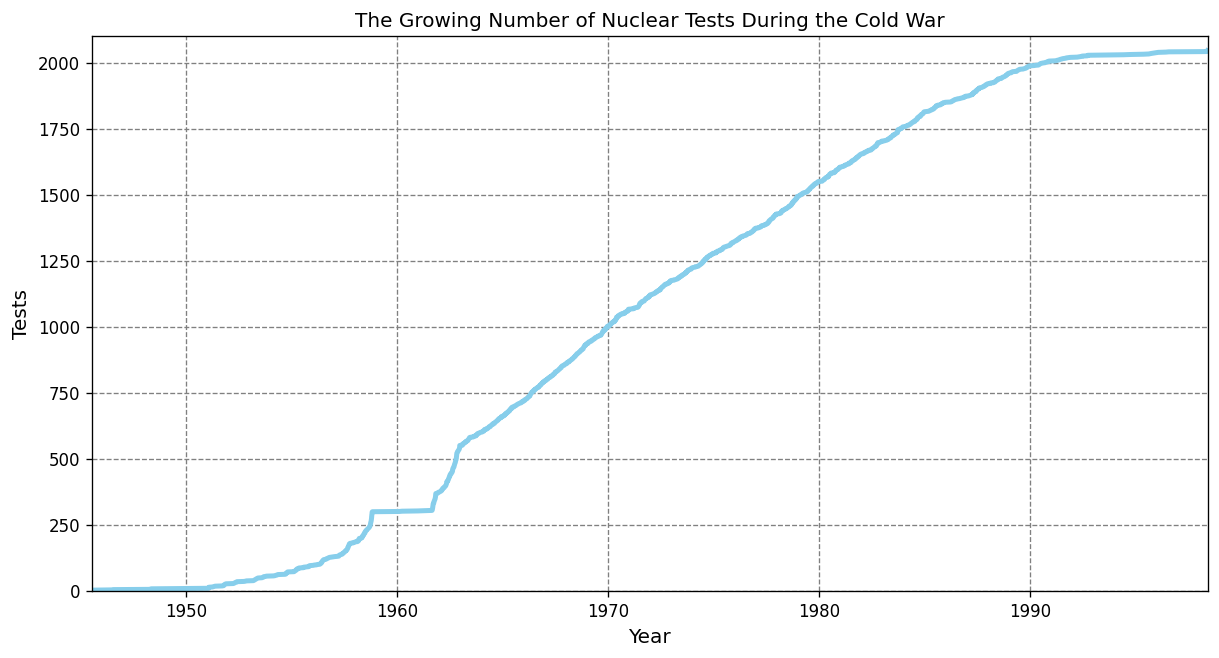

In [42]:
plt.figure(figsize=(12,6), dpi=120)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=0)
plt.title('The Growing Number of Nuclear Tests During the Cold War', fontsize=12)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Tests', fontsize=12)

plt.grid(color='grey', linestyle='--')

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.xlim([df_nuclear.Date.min(), df_nuclear.Date.max()])
plt.ylim([0, 2100])
plt.locator_params(axis='x', nbins=10)

plt.plot(df_nuclear.Date, df_nuclear.index, color='skyblue', linewidth=3)

plt.show()

The initial years after the creation of the first nuclear bomb were relatively quiet. However, after the USSR tested it's own atomic weapon, the years of the Cold War mostly showed a steady increase in nuclear tests which was again followed by a quiet period in the '90s, as a direct result of the disintegration of the Soviet Union and the The Strategic Arms Reduction Treaty (START I) signed in 1991.

In [43]:
# Plotting a line chart to see the number of nuclear tests for all seven countries over the years
test_by_year = df_nuclear.groupby(by=['Country', 'Date'], as_index=False).count()
test_by_year = test_by_year.sort_values('Date')[['Date', 'Country', 'Name']]

cumulative_tests = test_by_year.groupby(by=['Country', 'Date']).sum().groupby(level=[0]).cumsum()
cumulative_tests.reset_index(inplace=True)

l_chart = px.line(cumulative_tests,
                  x='Date',
                  y='Name',
                  color='Country',
                  hover_name='Country',
                  title='The Number of Nuclear Tests Conducted Over the Years by Each Atomic Power')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Tests')

l_chart.show()

But what's that straight line in the late '50s and early '60s? Let's examine the nuclear tests from that period.

In [44]:
df_nuclear.loc[(df_nuclear.Date >= '1958-12-01') & (df_nuclear.Date < '1961-08-31')]

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,Day,Month,Year,Date
300,FRANCE,Reggane Alg,DOE,26.19,-0.04,0.00,0.00,-0.10,0.00,200.00,We,Gerboise Bleue,Tower,13,2,1960,1960-02-13
301,FRANCE,Reggane Alg,DOE,26.00,-0.09,0.00,0.00,-0.00,0.00,20.00,Wr,Gerboiseblanche,Surface,1,4,1960,1960-04-01
302,FRANCE,Reggane Alg,DOE,26.00,-0.10,0.00,0.00,0.00,0.00,20.00,We,Gerboise Rouge,Tower,27,12,1960,1960-12-27
303,FRANCE,Reggane Alg,DOE,26.00,-0.10,0.00,0.00,0.00,0.00,20.00,Wr,Gerboise Verte,Tower,25,4,1961,1961-04-25


Due to the increasing public concern starting from 1955 regarding nuclear tests performed in space and the atmosphere and the possibility of a radioactive fallout, both the US and the Soviet Union temporarily suspended their nuclear tests starting from 1959 for almost two years.

### The lowest number of tests

The last country in the list based on the number of tests is Pakistan with 2 recorded explosions. If we look at the last two countries from this aspect, we will notice that four of these atomic tests were very close to each other.

In [45]:
short_list = ['INDIA', 'PAKIST']
df_nuclear[df_nuclear['Country'].isin(short_list)]

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,Day,Month,Year,Date
1235,INDIA,Pokhran,UGS,26.90,71.70,5.00,0.00,0.00,0.00,20.00,Pne,Nan,Shaft,18,5,1974,1974-05-18
2042,INDIA,Pokhran,HFS,27.07,71.70,5.30,0.00,0.00,0.00,20.00,Wr,Shakti 1-3,Ug,11,5,1998,1998-05-11
2043,INDIA,Pokhran,NRD,27.07,71.70,0.00,0.00,0.00,0.00,1.00,Wr,Nan,Ug,13,5,1998,1998-05-13
2044,PAKIST,Chagai,HFS,28.90,64.89,0.00,0.00,0.00,0.00,35.00,Wr,Nan,Ug,28,5,1998,1998-05-28
2045,PAKIST,Kharan,HFS,28.49,63.78,5.00,0.00,0.00,0.00,18.00,Wr,Nan,Ug,30,5,1998,1998-05-30


What happened there? India's first successful nuclear test was conducted in 1974, usually referred to as the "Smiling Buddha". Although India claimed that it was done for peaceful purposes, the real reason was likely to be a deterrent against Pakistan. Pakistan took it as a hostile act and said they would be forced to test their own nuclear bomb. This, however, did not happen until after the 1998 general elections in India, after which two further nuclear tests were conducted by India. In response, Pakistan detonated their first nuclear devices just two weeks after the Indian tests, which again, was taken by India as justification for their own nuclear programme. A real chicken or egg dilemma.

### Test Purposes
Now, let's see the purpose of these atomic tests.

In [46]:
bar2 = px.bar(x = num_purposes.index[:10], # index = category name
             y = num_purposes.values[:10], # count
             title='Nuclear Deployment Purposes',
             hover_name=num_purposes.index[:10],
             color=num_purposes.values[:10],
             color_continuous_scale='Agsunset')

bar2.update_layout(xaxis_title='Purpose',
yaxis_title='Number of Detonations',
coloraxis_showscale=False,
width=800)

bar2.show()

As the bar chart shows, the highest number of tests (over 1500) were conducted as weapons development tests, while the lowest number constitutes an explosion as part of a Soviet military exercise in 1954 (see below).

In [47]:
df_nuclear[df_nuclear.Purpose_of_Detonation == 'Me']

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,Day,Month,Year,Date
62,USSR,Orenbg Russ,DOE,52.00,55.00,0.00,0.00,0.00,40.00,40.00,Me,Nan,Atmosph,14,9,1954,1954-09-14


Although based on its size, the second smallest group seems insignificant at first, it constitutes the two bombs that were deployed during combat, dropped on the Japanese cities of Hiroshima and Nagasaki towards the end of WWII, in August 1945.

In [48]:
df_nuclear[df_nuclear.Purpose_of_Detonation == 'Combat']

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,Day,Month,Year,Date
1,USA,Hiroshima,DOE,34.23,132.27,0.00,0.00,-0.60,15.00,15.00,Combat,Littleboy,Airdrop,5,8,1945,1945-08-05
2,USA,Nagasaki,DOE,32.45,129.52,0.00,0.00,-0.60,21.00,21.00,Combat,Fatman,Airdrop,9,8,1945,1945-08-09


### First and Last Tests
The first ever weapons development test was incidentally the first ever nuclear test performed by the USA, known as "Trinity":

In [49]:
df_nuclear[df_nuclear.Purpose_of_Detonation == "Wr"].agg({'Date': pd.Series.min})

,0
Date,1945-07-16


In [50]:
# Check who performed the test on 1945-07-16
df_nuclear[df_nuclear.Date == '1945-07-16']

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,Day,Month,Year,Date
0,USA,Alamogordo,DOE,32.54,-105.57,0.00,0.00,-0.10,21.00,21.00,Wr,Trinity,Tower,16,7,1945,1945-07-16


The last nuclear blast before the completion of the original report was recorded in Pakistan, as mentioned above.

In [51]:
df_nuclear[df_nuclear.Date == df_nuclear.Date.max()]

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,Day,Month,Year,Date
2045,PAKIST,Kharan,HFS,28.49,63.78,5.00,0.00,0.00,0.00,18.00,Wr,Nan,Ug,30,5,1998,1998-05-30


### Methods of Deployment
We can also examine the preferred methods of deployment.

In [52]:
# Check the unique deployment methods
df_nuclear.Deployment_Method.unique()

array(['Tower', 'Airdrop', 'Uw', 'Surface', 'Crater', 'Ship', 'Atmosph',
       'Barge', 'Balloon', 'Rocket', 'Shaft', 'Tunnel', 'Watersur',
       'Space', 'Gallery', 'Ug', 'Shaft/Gr', 'Mine', 'Shaft/Lg'],
      dtype=object)

In [53]:
# Plot the data in a bar chart
bar3 = px.bar(x = num_methods.index[:20], # index = category name
             y = num_methods.values[:20], # count
             title='Nuclear Deployment Method Preferences',
             hover_name=num_methods.index[:20],
             color=num_methods.values[:20],
             color_continuous_scale='Agsunset')

bar3.update_layout(xaxis_title='Method',
yaxis_title='Number of Detonations',
coloraxis_showscale=False)

bar3.show()

According to the original report, the two types of nuclear detonations were atmospheric and underground. Where no other data was available, the detonation was labeled 'Atmosph' or 'Ug'. As we can see, detonating nuclear devices was mostly done using vertically drilled underground shafts. The subcategeories of shaft detonations designate the French tests conducted in Polynesia using wells in the ground (Shaft/Ug) or shafts drilled in lagoons of atolls (Shaft/Lg). The 'Mine' category has only one test which was a relatively small detonation performed by the USSR in a Ukrainian mine.

In [54]:
df_nuclear[df_nuclear.Deployment_Method == 'Mine']

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,Day,Month,Year,Date
1533,USSR,Ukraine,MTM,0.00,0.00,0.00,0.00,0.00,0.30,0.30,Pne,Klivazh,Mine,16,9,1979,1979-09-16


The categories of 'Space' and 'Rocket' deserve a second look. The former only has 4 recorded instances, all of which were performed by the USSR, while the latter included 11 high-altitude tests done by the USA within Operation Fishbowl at Johnston Island, Johnston Atoll. Although China performed a single rocket test in 1966, this was a surface-to-surface missile which detonated in the atmosphere, not in space (China's first satellite was launched into Earth orbit in 1970). The low number of these tests is, first of all, due to the relatively recent technology required to reach space with rockets, and soon after, the Nuclear Test-Ban Treaty was signed by the main atomic powers in August 1963, followed by dozens of other countries in the upcomong months. This treaty banned nuclear tests conducted in the atmosphere, space, and underwater. China was among the few countries who did not sign the agreement.

In [55]:
space_rocket = ['Space', 'Rocket']
df_nuclear[df_nuclear['Deployment_Method'].isin(space_rocket)]

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,Day,Month,Year,Date
148,USA,Nts,DOE,37.00,-116.00,0.00,0.00,-6.80,2.00,2.00,We,John,Rocket,19,7,1957,1957-07-19
231,USA,Johnston Is,DOE,16.45,-169.32,0.00,0.00,-85.00,"3,800.00","3,800.00",We,Teak,Rocket,1,8,1958,1958-08-01
233,USA,Johnston Is,DOE,16.45,-169.32,0.00,0.00,-45.00,"3,800.00","3,800.00",We,Orange,Rocket,12,8,1958,1958-08-12
236,USA,S. Atlantic,DOE,-38.50,-11.50,0.00,0.00,-160.00,1.00,2.00,We,Argus:I,Rocket,27,8,1958,1958-08-27
237,USA,S. Atlantic,DOE,-49.50,-8.20,0.00,0.00,-160.00,1.00,2.00,We,Argus:Ii,Rocket,30,8,1958,1958-08-30
239,USA,S. Atlantic,DOE,-48.50,-9.70,0.00,0.00,-160.00,1.00,2.00,We,Argus:Iii,Rocket,6,9,1958,1958-09-06
351,USSR,Mtr Russ,MTM,48.00,46.00,0.00,0.00,0.00,1.20,1.20,We,Nan,Space,27,10,1961,1961-10-27
352,USSR,Mtr Russ,MTM,48.00,46.00,0.00,0.00,0.00,1.20,1.20,We,Nan,Space,27,10,1961,1961-10-27
436,USA,Johnston Is,DOE,16.45,-169.32,0.00,0.00,-400.00,"1,400.00","1,400.00",We,Starfish Prime,Rocket,9,7,1962,1962-07-09
497,USA,Johnston Is,DOE,16.45,-169.32,0.00,0.00,0.00,0.00,20.00,We,Checkmate,Rocket,20,10,1962,1962-10-20


Let's look at this data from a different aspect, separating the atmospheric and underground/underwater tests. Earlier, we have counted the number of methods in 'num_methods'. Now, we are going to separate those categories into two groups: atmospheric and underground/underwater.

In [56]:
num_methods.sort_index(ascending=True)

,count
Deployment_Method,
Airdrop,78
Atmosph,184
Balloon,60
Barge,40
Crater,9
Gallery,13
Mine,1
Rocket,12
Shaft,1015


In [57]:
# Creating two lists containing the atmospheric and the underground/underwater categories respectively
atmospheric = ['Airdrop', 'Atmosph', 'Balloon', 'Barge', 'Crater', 'Rocket',
               'Ship', 'Space', 'Surface', 'Tower', 'Watersur']
underground_underwater = ['Gallery', 'Mine', 'Shaft', 'Shaft/Gr', 'Shaft/Lg',
                          'Tunnel', 'Ug', 'Uw']

In order to show the atmospheric categories on the plus side and the underground/underwater categories on the negative side of our y-axis in the stacked bar chart, we need negative numbers for the latter. First, let's create a column for these values.

In [58]:
# Adding an extra column with 0 values (we'll change them in the next step)
df_nuclear.insert(13 ,'DM_value', 0)
df_nuclear.head()

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,DM_value,Day,Month,Year,Date
0,USA,Alamogordo,DOE,32.54,-105.57,0.00,0.00,-0.10,21.00,21.00,Wr,Trinity,Tower,0,16,7,1945,1945-07-16
1,USA,Hiroshima,DOE,34.23,132.27,0.00,0.00,-0.60,15.00,15.00,Combat,Littleboy,Airdrop,0,5,8,1945,1945-08-05
2,USA,Nagasaki,DOE,32.45,129.52,0.00,0.00,-0.60,21.00,21.00,Combat,Fatman,Airdrop,0,9,8,1945,1945-08-09
3,USA,Bikini,DOE,11.35,165.20,0.00,0.00,-0.20,21.00,21.00,We,Able,Airdrop,0,30,6,1946,1946-06-30
4,USA,Bikini,DOE,11.35,165.20,0.00,0.00,0.03,21.00,21.00,We,Baker,Uw,0,24,7,1946,1946-07-24


Now, we create a for loop to look through all the values of the Deployment_Method column. If an individual value can be found in the list of underground_underwater methods, using the loc function, we set the corresponding value in the DM_value column to -1; otherwise, we set the value to 1.

In [59]:
df_nuclear.sort_values('Deployment_Method')

for method in df_nuclear['Deployment_Method']:
  if method in underground_underwater:
    df_nuclear.loc[df_nuclear.Deployment_Method == method, 'DM_value'] = -1
  else:
    df_nuclear.loc[df_nuclear.Deployment_Method == method, 'DM_value'] = 1

In [60]:
# Creating a subset with the added values of the deployment methods for each country and year
country_methods = df_nuclear.groupby(['Year', 'Deployment_Method', 'Country'],
                               as_index=False).agg({'DM_value': pd.Series.sum})
# Changing the column name to provide more info for the chart
country_methods = country_methods.rename(columns={'DM_value': 'Number_of_Tests'})
country_methods

,Year,Deployment_Method,Country,Number_of_Tests
0,1945,Airdrop,USA,2
1,1945,Tower,USA,1
2,1946,Airdrop,USA,1
3,1946,Uw,USA,-1
4,1948,Tower,USA,3
...,...,...,...,...
300,1995,Ug,FRANCE,-5
301,1996,Ug,CHINA,-2
302,1996,Ug,FRANCE,-1
303,1998,Ug,INDIA,-2


In [61]:
# We can finally plot the combined stacked bar chart
bar = px.bar(country_methods,
             x = 'Year',
             y = 'Number_of_Tests',
             color = 'Country',
             color_continuous_scale='Aggrnyl',
             title = 'Atmospheric and Underground/Underwater Tests Conducted by Each Country per Year',
             hover_data='Deployment_Method'
             )
bar.update_xaxes(range=[1945,1998])

bar.update_layout(xaxis_title='Year',
                  yaxis_title='Underground/Underwater         -         Atmospheric Explosions',
                  coloraxis_showscale=True,
                  width=1200,
                  height=800,
                  xaxis = dict(
                    tickfont = dict(size=10),
                    tickmode = 'linear',
                    tick0 = 1945,
                    dtick = 2,
                    titlefont=dict(size=14)),
                  yaxis = dict(
                    tickfont = dict(size=10),
                    tickmode = 'linear',
                    tick0 = 0,
                    dtick = 10,
                    titlefont=dict(size=14),
                    )
                  )

bar.show()

## Explosive Power

The most important attribute of a nuclear explosion is its blast force. Let's take a look at how the explosive force of US and Soviet nuclear bombs changed over the years. For this, I will create a scatter plot and a box plot.

In [62]:
# Creating subsets with the two above-mentioned countries
USA_tests = df_nuclear[df_nuclear.Country == 'USA']
USSR_tests = df_nuclear[df_nuclear.Country == 'USSR']
frames = [USA_tests, USSR_tests]
USA_USSR_tests = pd.concat(frames)

In [63]:
# To check the values
USA_USSR_tests.Upper_Yield_KT.sort_values(ascending=False)

,Upper_Yield_KT
355,"50,000.00"
479,"50,000.00"
547,"24,200.00"
447,"21,100.00"
478,"19,100.00"
...,...
293,0.00
151,0.00
579,0.00
281,0.00


Above we can see that there are null values which might mean that there was no data available on the test. For the purpose of clarity, I will omit those columns where the "Upper_Yield_KT" was 0.

In [64]:
df_nonzero_yield = USA_USSR_tests.drop(USA_USSR_tests[USA_USSR_tests['Upper_Yield_KT'] == 0.00].index)

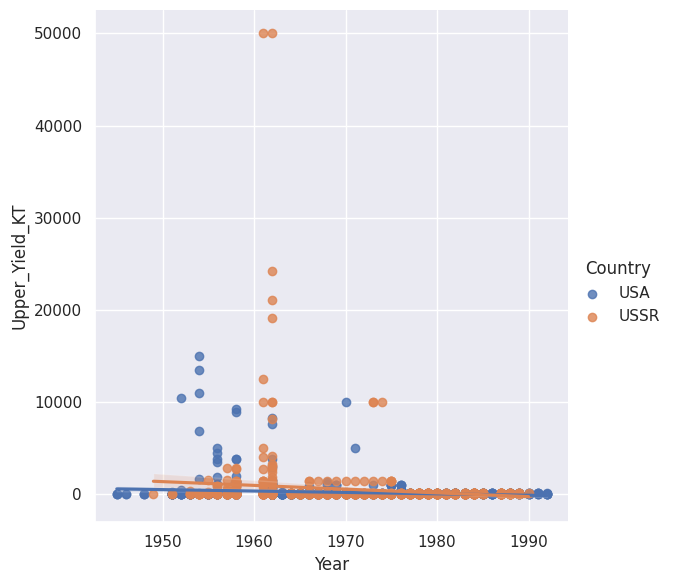

In [65]:
sns.set_theme(style="darkgrid")
sns.lmplot(x="Year", y="Upper_Yield_KT", hue="Country", data=df_nonzero_yield, height=6)


This chart tells us that - not counting a few exceptions discussed below - there was a slight but noticeable decrease in explosive power in the case of both countries.

In [66]:
# Let's see the data in a boxplot
box = px.box(df_nonzero_yield,
             x='Country',
             y='Upper_Yield_KT',
             title='Nuclear Explosion Yields for the US and the USSR',
             color='Country')

box.update_layout(xaxis_title='Country',
                  yaxis_title='Explosion Yield in Kilotons',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'),
                  )
box.update_layout(height=800, width=600)

box.show()

The charts show that the highest-yield nuclear explosions came from the Soviet Union (see the top of the chart at 50.000 kilotons), and the median number was about 20.000 kilotons in both countries. Let's see more information on the most powerful nuclear devices.

In [67]:
USA_USSR_tests[USA_USSR_tests.Upper_Yield_KT == 50000.00]

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,DM_value,Day,Month,Year,Date
355,USSR,Nz Russ,UGS,73.80,53.50,0.00,0.00,0.00,"50,000.00","50,000.00",Wr,Nan,Atmosph,1,30,10,1961,1961-10-30
479,USSR,Nz Russ,UGS,74.30,52.40,0.00,0.00,0.00,"10,000.00","50,000.00",Wr,Nan,Atmosph,1,27,9,1962,1962-09-27


Although the name is missing, the nuclear device detonated on October 30th 1961 is often referred to as "Tsar Bomba", which was the largest nuclear device ever set off. Originally intended to be 100 megatons, its power was decreased out of fear of the subsequent radioactive fallout.

Let's compare the yearly tests performed by these two countries:

In [68]:
US_tests_per_year = USA_tests.groupby(by='Year').count().Date
# US_moving_average = US_tests_per_year.rolling(window=1).mean()
US_tests_per_year.head(10)

,Date
Year,
1945,3
1946,2
1948,3
1951,16
1952,10
1953,11
1954,6
1955,18
1956,18


When we look at the data, we notice that not every year is present in the list. If we plot the line chart like this, it will give us false information as it will jump over the missing years instead of marking them as 0. To correct this, we need to turn these series to dataframes, set up a range of years, and assign 0 values to the years with no data.

In [69]:
df_US = pd.DataFrame({'Year':US_tests_per_year.index, 'Explosion':US_tests_per_year.values})
df_US.head(10)

,Year,Explosion
0,1945,3
1,1946,2
2,1948,3
3,1951,16
4,1952,10
5,1953,11
6,1954,6
7,1955,18
8,1956,18
9,1957,32


In [70]:
df_US = df_US.set_index('Year')
df_new_US = pd.DataFrame({"Year":range(1945, 1994), "Explosion": 0}).set_index("Year")
df_new_US["Explosion"]=df_US["Explosion"]
df_new_US.fillna(0, inplace=True)
df_new_US["Explosion"].astype(int)
df_new_US.head(10)

,Explosion
Year,
1945,3.00
1946,2.00
1947,0.00
1948,3.00
1949,0.00
1950,0.00
1951,16.00
1952,10.00
1953,11.00


Now we repeat the same for the USSR below.

In [71]:
USSR_tests_per_year = USSR_tests.groupby(by='Year').count().Date
# USSR_moving_average = USSR_tests_per_year.rolling(window=1).mean()
USSR_tests_per_year.head(10)

,Date
Year,
1949,1
1951,2
1953,5
1954,10
1955,6
1956,9
1957,16
1958,34
1961,59


In [72]:
df_USSR = pd.DataFrame({'Year':USSR_tests_per_year.index, 'Explosion':USSR_tests_per_year.values})
df_USSR.head(10)

,Year,Explosion
0,1949,1
1,1951,2
2,1953,5
3,1954,10
4,1955,6
5,1956,9
6,1957,16
7,1958,34
8,1961,59
9,1962,79


In [73]:
df_USSR = df_USSR.set_index('Year')
df_new_USSR = pd.DataFrame({"Year":range(1945, 1993), "Explosion": 0}).set_index("Year")
df_new_USSR["Explosion"]=df_USSR["Explosion"]
df_new_USSR.fillna(0, inplace=True)
df_new_USSR["Explosion"].astype(int)
df_new_USSR.head(10)

,Explosion
Year,
1945,0.00
1946,0.00
1947,0.00
1948,0.00
1949,1.00
1950,0.00
1951,2.00
1952,0.00
1953,5.00


Finally, we can plot the line chart using the new dataframes:

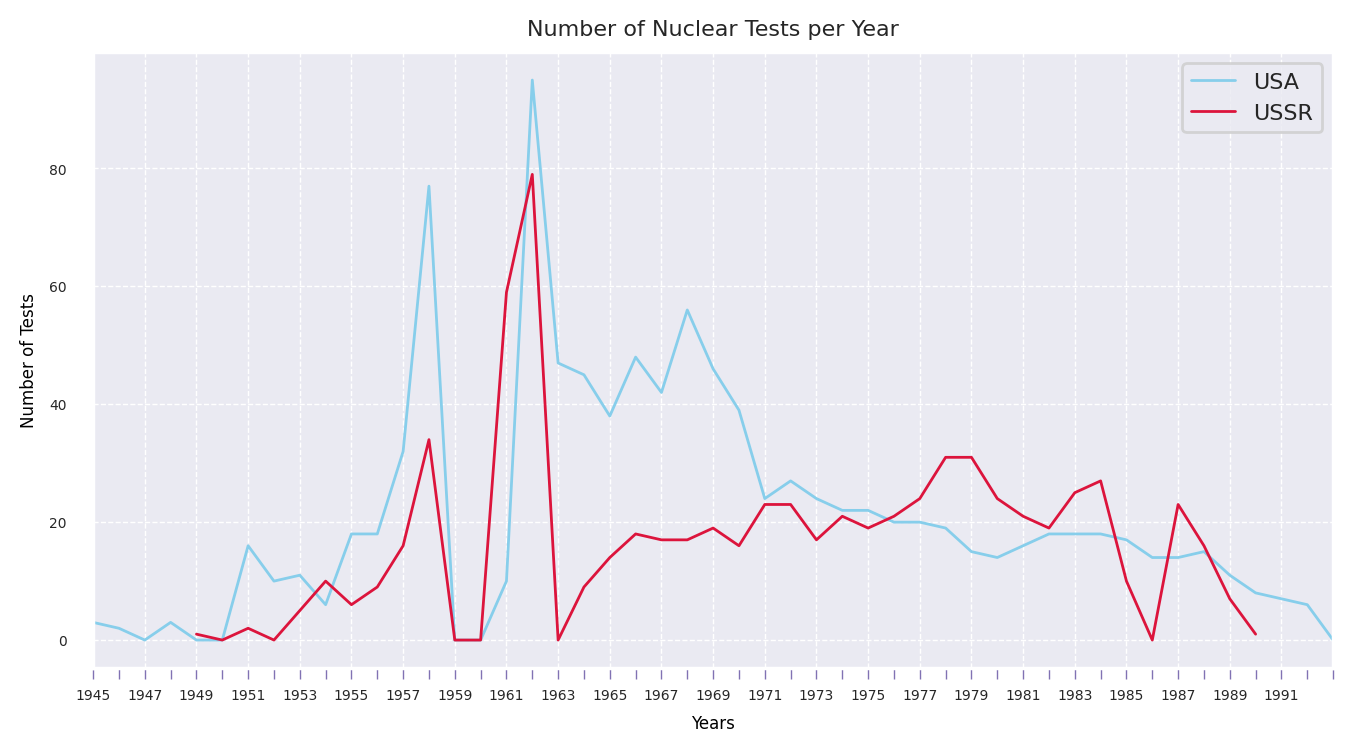

In [74]:
plt.figure(figsize=(8,4), dpi=200)
plt.title('Number of Nuclear Tests per Year', fontsize=8)
plt.yticks(fontsize=5)
plt.xticks(ticks=np.arange(1945, 1993, step=2),
           fontsize=5, )

plt.ylabel('Number of Tests', color='black', fontsize=6)
plt.xlabel('Years', color='black', fontsize=6)

ax = plt.gca()

# Setting up minor locators to correspond for every other year
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.tick_params(axis='x', color='m', length=4, direction='out', width=0.5, bottom=True, left=True, which='both', )
# ax.tick_params(which='minor', length=4, color='black', width=0.5)

ax.set_xlim(1945, 1993)

plt.grid(color='white', linestyle='--', linewidth=0.5)

US_line, = plt.plot(df_new_US.index,
                    df_new_US.values,
                    color='skyblue',
                    linewidth=1,
                    linestyle='-',
                    label='USA')

# The USSR started its atomic tests in 1949 and ended them in 1990, so we need to slice the range because we used the same range as for the US (alternatively, we can just change the range for the USSR above)
USSR_line, = plt.plot(df_new_USSR.index[4:-2],
                    df_new_USSR.values[4:-2],
                    color='crimson',
                    linewidth=1,
                    label='USSR')


plt.legend(handles=[US_line, USSR_line],
           fontsize=8)

plt.show()

### Nuclear Tests in the World
There is one last thing that I would like to see in a chart and that is the geographical spread of the explosions. For this, we will import geopandas.


In [75]:
# We will create another data frame containing only the explosions that had a yield > 0.
df_nonzero_yield_all = df_nuclear.drop(df_nuclear[df_nuclear['Upper_Yield_KT'] == 0.00].index)
df_nonzero_yield_all

,Country,Region,Source,Latitude,Longitude,Body_Wave_Magnitude,Surface_Wave_Magnitude,Explosion_Depth,Lower_Yield_KT,Upper_Yield_KT,Purpose_of_Detonation,Name,Deployment_Method,DM_value,Day,Month,Year,Date
0,USA,Alamogordo,DOE,32.54,-105.57,0.00,0.00,-0.10,21.00,21.00,Wr,Trinity,Tower,1,16,7,1945,1945-07-16
1,USA,Hiroshima,DOE,34.23,132.27,0.00,0.00,-0.60,15.00,15.00,Combat,Littleboy,Airdrop,1,5,8,1945,1945-08-05
2,USA,Nagasaki,DOE,32.45,129.52,0.00,0.00,-0.60,21.00,21.00,Combat,Fatman,Airdrop,1,9,8,1945,1945-08-09
3,USA,Bikini,DOE,11.35,165.20,0.00,0.00,-0.20,21.00,21.00,We,Able,Airdrop,1,30,6,1946,1946-06-30
4,USA,Bikini,DOE,11.35,165.20,0.00,0.00,0.03,21.00,21.00,We,Baker,Uw,-1,24,7,1946,1946-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,CHINA,Lop Nor,HFS,41.69,88.35,5.30,0.00,0.00,3.00,12.00,Wr,Nan,Ug,-1,29,7,1996,1996-07-29
2042,INDIA,Pokhran,HFS,27.07,71.70,5.30,0.00,0.00,0.00,20.00,Wr,Shakti 1-3,Ug,-1,11,5,1998,1998-05-11
2043,INDIA,Pokhran,NRD,27.07,71.70,0.00,0.00,0.00,0.00,1.00,Wr,Nan,Ug,-1,13,5,1998,1998-05-13
2044,PAKIST,Chagai,HFS,28.90,64.89,0.00,0.00,0.00,0.00,35.00,Wr,Nan,Ug,-1,28,5,1998,1998-05-28


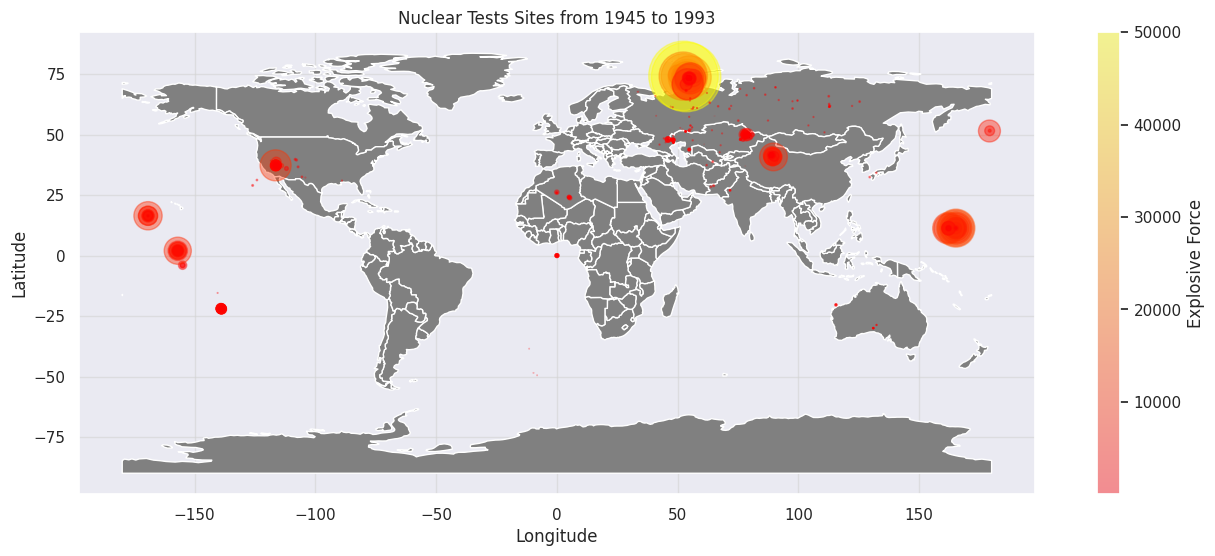

In [76]:
# Plotting a map on axis
#worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap = gpd.read_file('/content/map/ne_110m_admin_0_countries.shp')

# Initialising an axis
fig, ax = plt.subplots(figsize=(16, 6))
worldmap.plot(color="grey", ax=ax)

x=df_nonzero_yield_all["Longitude"]
y=df_nonzero_yield_all["Latitude"]
z=df_nonzero_yield_all["Upper_Yield_KT"]

plt.scatter(
    x, y,
    s=0.05*z,
    c=z,
    alpha=0.4,
    cmap="autumn")

plt.title("Nuclear Tests Sites from 1945 to 1993")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.colorbar(label='Explosive Force')
plt.grid(linestyle='-', color='lightgrey', alpha=0.6)

plt.show()


Since most locations for these explosions coincided, we cannot tell the number of tests in a specific location based on the above map; however, we can check which geographical regions were the most polluted by radiation:

In [77]:
# Checking for the top 10 sites with the most nuclear tests conducted
df_nonzero_yield_all.Region.value_counts().head(10)

,count
Region,
Nts,913
Semi Kazakh,455
Mururoa,163
Nz Russ,130
Lop Nor,42
Enewetak,41
Christmas Is,30
Bikini,23
Astrak Russ,15


According to the original report, the tests sited with the highest number of atomic explosions are Nts (Nevada Test Site), Semi Kazakh (Semipalatinsk test site in east Kazakhstan), Mururoa Atoll (French Polynesia), and Nz Russ (Novaya Zemlya Northern Test Site, in the
Arctic Ocean, Russia). What about the sites with the lowest number of explosions?

In [78]:
# Sites with the lowest number of nuclear explosions
df_nonzero_yield_all.Region.value_counts().tail(10)

,count
Region,
C. Nevada,1
Farmingt Nm,1
Uzbek,1
Hiroshima,1
Fallon Nv,1
Carlsbad Nm,1
Htr Russ,1
Offuswcoast,1
Nagasaki,1


Naturally, most of these sites are nuclear tests site; however, we can also see here the two ill-fated Japanese cities of Hiroshima and Nagasaki that were bombed at the end of WWII.

# **Conclusion**
As we can see from this dataset, the race to harness and weaponize the awesome power of the atom took place mainly between two countries: the USA and the USSR. The total number of tests showed a steady increase until the 90s when the two parties mutually agreed on nuclear disarmament. Although in the 60s, atmospheric and underwater tests were internationally banned, underground explosions still posed a health risk through groundwater contamination. Since most of the tests took place in uninhabited areas, with a little luck, residual radiation will not create significant problems for the human population. Still, one can only hope that no matter the conflict between them, nuclear superpowers will be more responsible in the future and will not consider the deployment of these weapons or the re-assumption of nuclear testing with a deterrent purpose.